
### Problem Statement

PV will consume existing back-up reserves of online conventional generators to help to manage its intermittency.

### Business Objective

To forecast solar irradiance to reduce uncertainties in balancing supply and demand of electricity, so that system operators can take prompt necessary counter-measures to address variations in PV.

### Analytic Objective

To determine the feasibility of using solar irradiance prediction models to aid in electricity load forecasts through understanding their accuracies and computation times


In [10]:
# To load libraries 
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras import optimizers
import tensorflow as tf
print('Keras version: ',keras.__version__)
print('Tensorflow version: ', tf.__version__)

from math import sqrt
from numpy import concatenate

import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt

# To set up working directory
import os
print (os.getcwd())

# To change current working directory
#os.chdir('C:\Users\bst\Desktop')
print (os.getcwd())



Keras version:  2.0.6
Tensorflow version:  1.3.0
C:\Users\bst\Desktop
C:\Users\bst\Desktop


In [11]:
# To read in the txt files
import numpy as np
import pandas as pd   
import os

main = 'E:\InternShip\SERIS\\401'

os.chdir(main)
os.getcwd()
os.listdir(main)

input_files = [] 
for year in os.listdir(main):
    for month in os.listdir(main + "\\" + year):
        for day in os.listdir(main + "\\" + year + "\\" + month):
            os.chdir(main +'/' + year + '/' + month)
            try:
                txt_file = pd.read_table(day,delimiter="\t")
            except:
                continue
            input_files.append(txt_file)
            

# to create a big data frame by concatinating all files
big_df = pd.concat(input_files)

big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617676 entries, 0 to 1055
Data columns (total 21 columns):
Air_P        2493 non-null float64
AvgAir_P     1615183 non-null float64
AvgGSi00     1615183 non-null float64
AvgHamb      1615183 non-null float64
AvgSPN1_D    1615183 non-null float64
AvgSPN1_G    1615183 non-null float64
AvgTSi00     1615183 non-null float64
AvgTamb      1615183 non-null float64
AvgWind_D    1615183 non-null float64
AvgWind_S    1615183 non-null float64
GSi00        2493 non-null float64
Hamb         2493 non-null float64
Rec_ID       1615183 non-null float64
Record_ID    2493 non-null float64
SPN1_D       2493 non-null float64
SPN1_G       2493 non-null float64
Tamb         2493 non-null float64
Tm           1617676 non-null object
Tsi00        2493 non-null float64
Wind_S       2493 non-null float64
Wind_d       2493 non-null float64
dtypes: float64(20), object(1)
memory usage: 271.5+ MB


In [12]:
big_df.head()

,Air_P,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,...,Hamb,Rec_ID,Record_ID,SPN1_D,SPN1_G,Tamb,Tm,Tsi00,Wind_S,Wind_d
0,NaN,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,...,NaN,284209.0,NaN,NaN,NaN,NaN,2013-05-01 00:06:00,NaN,NaN,NaN
1,NaN,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,...,NaN,284210.0,NaN,NaN,NaN,NaN,2013-05-01 00:07:00,NaN,NaN,NaN
2,NaN,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,...,NaN,284211.0,NaN,NaN,NaN,NaN,2013-05-01 00:08:00,NaN,NaN,NaN
3,NaN,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,...,NaN,284212.0,NaN,NaN,NaN,NaN,2013-05-01 00:09:00,NaN,NaN,NaN
4,NaN,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,...,NaN,284213.0,NaN,NaN,NaN,NaN,2013-05-01 00:10:00,NaN,NaN,NaN


In [13]:
big_df.tail()

,Air_P,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,...,Hamb,Rec_ID,Record_ID,SPN1_D,SPN1_G,Tamb,Tm,Tsi00,Wind_S,Wind_d
1051,1000.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.1677,NaN,1906234.0,85.3354,238.912,31.9900,2016-05-31 17:38:00,37.2031,0.692540,123.416
1052,1000.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.3383,NaN,1906235.0,86.3499,235.839,31.9412,2016-05-31 17:39:00,37.1400,0.909315,106.765
1053,1000.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.3756,NaN,1906236.0,87.4294,231.136,31.8796,2016-05-31 17:40:00,37.0183,0.834796,117.704
1054,1000.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.4583,NaN,1906237.0,87.1218,228.752,31.8462,2016-05-31 17:41:00,37.0365,0.248174,154.862
1055,1000.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.7145,NaN,1906238.0,84.9759,223.256,31.8628,2016-05-31 17:42:00,37.1943,0.169042,142.168


In [14]:
# From 2016-05-30 00:00:00 onwards (last 2 days of the complete dataset) , there was a switchover in naming of sensor readings eg., from 'AvgGSi00' to 'GSi00'. Values are popluated into the new columns from stated datetimestamp. This causes a discrepancies of  2493 readings

# Since 2493 out of full length of data set is an insignificant amount, to discard the data for this date. 

2493 / 1617676 * 100

0.15410997010526212

In [15]:


big_df_1 = big_df[: -2493]
big_df_1.tail()





,Air_P,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,...,Hamb,Rec_ID,Record_ID,SPN1_D,SPN1_G,Tamb,Tm,Tsi00,Wind_S,Wind_d
1435,NaN,1002.560,0.158,81.829,2.216,3.686,27.708,29.746,199.285,0.010,...,NaN,1903731.0,NaN,NaN,NaN,NaN,2016-05-29 23:55:00,NaN,NaN,NaN
1436,NaN,1002.546,0.149,82.002,2.189,3.500,27.695,29.743,253.891,-0.018,...,NaN,1903732.0,NaN,NaN,NaN,NaN,2016-05-29 23:56:00,NaN,NaN,NaN
1437,NaN,1002.555,0.168,82.410,2.536,3.792,27.676,29.729,259.439,0.020,...,NaN,1903733.0,NaN,NaN,NaN,NaN,2016-05-29 23:57:00,NaN,NaN,NaN
1438,NaN,1002.557,0.125,82.458,2.322,3.698,27.662,29.696,220.842,-0.014,...,NaN,1903734.0,NaN,NaN,NaN,NaN,2016-05-29 23:58:00,NaN,NaN,NaN
1439,NaN,1002.577,0.134,82.540,2.453,3.877,27.640,29.674,249.468,-0.012,...,NaN,1903735.0,NaN,NaN,NaN,NaN,2016-05-29 23:59:00,NaN,NaN,NaN


In [16]:
# To drop redundant columns

del big_df_1['Wind_d']
del big_df_1['Wind_S']
del big_df_1['Tsi00']
del big_df_1['Tamb']
del big_df_1['SPN1_G']
del big_df_1['SPN1_D']
del big_df_1['Record_ID']
del big_df_1['Rec_ID']
del big_df_1['GSi00']
del big_df_1['Air_P']
del big_df_1['Hamb']

In [17]:


# To convert the Tm column to datetime dtype
big_df_1['Tm'] = pd.to_datetime(big_df_1['Tm'])

big_df_1['Date'] = big_df_1['Tm'].dt.date
big_df_1['Week'] = big_df_1['Tm'].dt.week
big_df_1['Month'] = big_df_1['Tm'].dt.month
big_df_1['Year'] = big_df_1['Tm'].dt.year
big_df_1['Time'] = big_df_1['Tm'].dt.time
big_df_1['Hour'] = big_df_1['Tm'].dt.hour
big_df_1['Minutes'] = big_df_1['Tm'].dt.minute

big_df_1.head()



C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,AvgAir_P,AvgGSi00,AvgHamb,AvgSPN1_D,AvgSPN1_G,AvgTSi00,AvgTamb,AvgWind_D,AvgWind_S,Tm,Date,Week,Month,Year,Time,Hour,Minutes
0,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,2013-05-01 00:06:00,2013-05-01,18,5,2013,00:06:00,0,6
1,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,2013-05-01 00:07:00,2013-05-01,18,5,2013,00:07:00,0,7
2,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,2013-05-01 00:08:00,2013-05-01,18,5,2013,00:08:00,0,8
3,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,2013-05-01 00:09:00,2013-05-01,18,5,2013,00:09:00,0,9
4,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,2013-05-01 00:10:00,2013-05-01,18,5,2013,00:10:00,0,10


In [18]:
big_df_1.columns

Index(['AvgAir_P', 'AvgGSi00', 'AvgHamb', 'AvgSPN1_D', 'AvgSPN1_G', 'AvgTSi00',
       'AvgTamb', 'AvgWind_D', 'AvgWind_S', 'Tm', 'Date', 'Week', 'Month',
       'Year', 'Time', 'Hour', 'Minutes'],
      dtype='object')

In [19]:


# To rename the columns with more readable names
big_df_1.columns = ['AirP', 'GSI', 'Hum', 'SPN_D', 'SPN_G', 'TSI', 'Tem', 'WindD', 'WindS', 'TimeStamp', 'Date','Wk', 'Mth', 'Yr', 'Time', 'Hr', 'Min']
big_df_1.head()





,AirP,GSI,Hum,SPN_D,SPN_G,TSI,Tem,WindD,WindS,TimeStamp,Date,Wk,Mth,Yr,Time,Hr,Min
0,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,2013-05-01 00:06:00,2013-05-01,18,5,2013,00:06:00,0,6
1,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,2013-05-01 00:07:00,2013-05-01,18,5,2013,00:07:00,0,7
2,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,2013-05-01 00:08:00,2013-05-01,18,5,2013,00:08:00,0,8
3,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,2013-05-01 00:09:00,2013-05-01,18,5,2013,00:09:00,0,9
4,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,2013-05-01 00:10:00,2013-05-01,18,5,2013,00:10:00,0,10


In [20]:


# To check for missing values
big_df_1.isnull().sum()



AirP         0
GSI          0
Hum          0
SPN_D        0
SPN_G        0
TSI          0
Tem          0
WindD        0
WindS        0
TimeStamp    0
Date         0
Wk           0
Mth          0
Yr           0
Time         0
Hr           0
Min          0
dtype: int64

In [21]:


big_df_1.info() 
# 1615183 entries



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615183 entries, 0 to 1439
Data columns (total 17 columns):
AirP         1615183 non-null float64
GSI          1615183 non-null float64
Hum          1615183 non-null float64
SPN_D        1615183 non-null float64
SPN_G        1615183 non-null float64
TSI          1615183 non-null float64
Tem          1615183 non-null float64
WindD        1615183 non-null float64
WindS        1615183 non-null float64
TimeStamp    1615183 non-null datetime64[ns]
Date         1615183 non-null object
Wk           1615183 non-null int64
Mth          1615183 non-null int64
Yr           1615183 non-null int64
Time         1615183 non-null object
Hr           1615183 non-null int64
Min          1615183 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(5), object(2)
memory usage: 221.8+ MB


In [22]:


# To clip the meteorologoical values within historical ranges with floor and ceiling
# Temperature
# s401[s401['Tem'] < 0.00] = 0.00
big_df_1['Tem'].clip(20, 37)
#df.where(df>-1,-1).where(df<1,1)

# Humidity
big_df_1['Hum'].clip(30, 100)

# GSI
big_df_1['GSI'].clip(0, 1500)

# WindS
big_df_1['WindS'].clip(0, 12)

# WindD
big_df_1['WindD'].clip(0, 360)

# Air Pressure
big_df_1['AirP'].clip(995, 1012)


print(big_df_1.describe())



               AirP           GSI           Hum         SPN_D         SPN_G  \
count  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06   
mean   1.002766e+03  1.772654e+02  7.862738e+01  1.070390e+02  1.885492e+02   
std    1.943715e+00  2.736839e+02  1.068494e+01  1.439542e+02  2.846125e+02   
min    9.958560e+02 -8.200000e-01  3.578300e+01 -2.568000e+00 -1.046000e+00   
25%    1.001438e+03  9.400000e-02  7.113700e+01  3.194000e+00  4.370000e+00   
50%    1.002787e+03  3.331000e+00  8.100000e+01  6.771000e+00  8.103000e+00   
75%    1.004102e+03  2.763905e+02  8.662700e+01  1.976890e+02  2.930850e+02   
max    1.009211e+03  1.394020e+03  1.011390e+02  7.393340e+02  1.414050e+03   

                TSI           Tem         WindD         WindS            Wk  \
count  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06  1.615183e+06   
mean   3.183094e+01  2.848123e+01  1.715682e+02  6.573763e-01  2.648626e+01   
std    9.267447e+00  2.328972e+00  5.469315e+01  6.

In [23]:


# To convert variables to categorical variable. To aid the model in recognizing temporal distribution of patterns.
for col in ['Wk', 'Mth', 'Yr',  'Hr']:
    big_df_1[col] = big_df_1[col].astype("category").cat.as_ordered()
    
big_df_1.info()



C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615183 entries, 0 to 1439
Data columns (total 17 columns):
AirP         1615183 non-null float64
GSI          1615183 non-null float64
Hum          1615183 non-null float64
SPN_D        1615183 non-null float64
SPN_G        1615183 non-null float64
TSI          1615183 non-null float64
Tem          1615183 non-null float64
WindD        1615183 non-null float64
WindS        1615183 non-null float64
TimeStamp    1615183 non-null datetime64[ns]
Date         1615183 non-null object
Wk           1615183 non-null category
Mth          1615183 non-null category
Yr           1615183 non-null category
Time         1615183 non-null object
Hr           1615183 non-null category
Min          1615183 non-null int64
dtypes: category(4), datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 178.7+ MB


In [24]:
# to zero out the dark out hours. 1900hr to 0700hr
big_df_1.loc[(big_df_1['Hr' ] >= 19) & (big_df_1['Hr'] <= 7), 'GSI'] = 0.00

C:\Users\bst\AppData\Local\Continuum\anaconda3\envs\tfkeras\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:


big_df_1[0:1440]



,AirP,GSI,Hum,SPN_D,SPN_G,TSI,Tem,WindD,WindS,TimeStamp,Date,Wk,Mth,Yr,Time,Hr,Min
0,1002.424,0.056,78.029,2.996,4.215,26.977,28.866,134.459,0.365,2013-05-01 00:06:00,2013-05-01,18,5,2013,00:06:00,0,6
1,1002.422,-0.091,78.097,2.979,4.121,26.965,28.854,130.833,0.346,2013-05-01 00:07:00,2013-05-01,18,5,2013,00:07:00,0,7
2,1002.408,-0.162,78.175,2.980,4.109,26.959,28.838,147.786,0.106,2013-05-01 00:08:00,2013-05-01,18,5,2013,00:08:00,0,8
3,1002.409,-0.036,78.261,3.061,4.289,26.952,28.831,154.436,0.318,2013-05-01 00:09:00,2013-05-01,18,5,2013,00:09:00,0,9
4,1002.402,-0.015,78.327,3.219,4.308,26.951,28.824,127.967,0.171,2013-05-01 00:10:00,2013-05-01,18,5,2013,00:10:00,0,10
5,1002.404,-0.002,78.337,3.139,4.311,26.925,28.824,182.876,-0.021,2013-05-01 00:11:00,2013-05-01,18,5,2013,00:11:00,0,11
6,1002.420,-0.105,78.405,3.145,4.375,26.864,28.828,164.710,-0.001,2013-05-01 00:12:00,2013-05-01,18,5,2013,00:12:00,0,12
7,1002.395,-0.090,78.368,3.175,4.362,26.825,28.835,140.227,0.077,2013-05-01 00:13:00,2013-05-01,18,5,2013,00:13:00,0,13
8,1002.395,0.009,78.355,3.266,4.453,26.827,28.835,124.322,0.333,2013-05-01 00:14:00,2013-05-01,18,5,2013,00:14:00,0,14
9,1002.365,0.002,78.350,3.137,4.345,26.847,28.834,144.063,0.232,2013-05-01 00:15:00,2013-05-01,18,5,2013,00:15:00,0,15


In [26]:


# To prepare this dataframe as final dataframe for modeling
df = big_df_1[['Tem', 'AirP', 'Hum', 'WindS', 'WindD', 'Wk', 'Hr', 'TimeStamp', 'GSI']]
df.index = pd.DatetimeIndex(df['TimeStamp'])
del df['TimeStamp']

df.info()
df.head()
df.tail()


# To set up working directory for assignment
import os
print (os.getcwd())

# To change current working directory
os.chdir('F:\Deep Learning Developer\Big Project - time series forecasts with LSTM')
print (os.getcwd())

# save to file
df.to_csv('s401_df.csv')



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1615183 entries, 2013-05-01 00:06:00 to 2016-05-29 23:59:00
Data columns (total 8 columns):
Tem      1615183 non-null float64
AirP     1615183 non-null float64
Hum      1615183 non-null float64
WindS    1615183 non-null float64
WindD    1615183 non-null float64
Wk       1615183 non-null category
Hr       1615183 non-null category
GSI      1615183 non-null float64
dtypes: category(2), float64(6)
memory usage: 89.3 MB
E:\InternShip\SERIS\401\2016\05
F:\Deep Learning Developer\Big Project - time series forecasts with LSTM


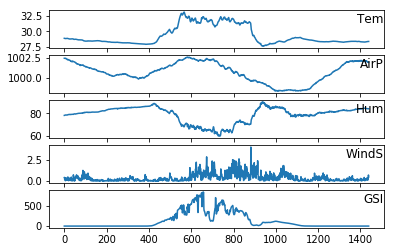

In [27]:


%matplotlib inline
import matplotlib.pyplot as plt

# To visualize the dataset for modeling. Just the first day of the dataset
values = df.values

# specify columns to plot
import matplotlib.pyplot as plt
%matplotlib inline

groups = [0, 1, 2, 3, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:1440, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1



### Prepare the dataset for RNN modeling

In [28]:


# To model with just numerical variables
df = df[['Tem', 'AirP', 'Hum', 'WindS', 'WindD', 'GSI']] # make a copy
df.head()



,Tem,AirP,Hum,WindS,WindD,GSI
TimeStamp,,,,,,
2013-05-01 00:06:00,28.866,1002.424,78.029,0.365,134.459,0.056
2013-05-01 00:07:00,28.854,1002.422,78.097,0.346,130.833,-0.091
2013-05-01 00:08:00,28.838,1002.408,78.175,0.106,147.786,-0.162
2013-05-01 00:09:00,28.831,1002.409,78.261,0.318,154.436,-0.036
2013-05-01 00:10:00,28.824,1002.402,78.327,0.171,127.967,-0.015


In [29]:
# To downsample the timeseries from per min to 15min resolution
df_15min = df.resample('15min').mean()
df_15min_np = df_15min.values
df_15min_np[0:5]

array([[  2.88372222e+01,   1.00240878e+03,   7.82615556e+01,
          1.88222222e-01,   1.45290667e+02,  -4.84444444e-02],
       [  2.88256000e+01,   1.00226767e+03,   7.85571333e+01,
          1.63066667e-01,   1.41579533e+02,  -4.78666667e-02],
       [  2.87622667e+01,   1.00208453e+03,   7.89160000e+01,
          1.08466667e-01,   1.63754533e+02,  -1.08666667e-02],
       [  2.87249333e+01,   1.00198193e+03,   7.91774000e+01,
          2.09400000e-01,   1.70337867e+02,  -1.56666667e-02],
       [  2.86622667e+01,   1.00175140e+03,   7.95979333e+01,
          3.98400000e-01,   1.64694067e+02,  -1.53333333e-02]])



To train for 2 year, validate with following month, and test with 6 hours of predictions

<br>
n_train_mins = 2 * 365 * 24 * 4 = 70080
<br>
n_val_mins = 70080 + (30 24 4) = 72960
<br>
sum_train_val = n_train_mins + n_val_mins
<br>
sum_train_val_test = n_train_mins + n_val_mins + (6 * 4) = 72984


In [138]:


# To convert the dataset in pandas dataframe into numpy array for modeling
df_np = df.values

# Need the normalize the individual time series since they are of vastly different scales. After normalization, they will take on small values of similar scale

# Pre-process entire dataset by subtracting with training set's mean and divide by training set's standard deviation
mean = df_np[0:70080].mean(axis=0)
df_np -= mean
std = df_np[0:70080].std(axis=0)
df_np /= std

print('Normalized dataset: ', df_np[0:5])

# Intuitively, not right to normalize on entire dataset with entire set's mean and std, then partition into training, validation and testing sets

# To reinstate independent and dependent variables to their original scales, multiply by std and add back mean
print('mean of features: ', mean)
print('std of features: ', std)



Normalized dataset:  [[-0.08968458  1.01869635  0.05885319 -0.31245627 -1.0814733  -0.64859344]
 [-0.09481586  1.01753785  0.06467479 -0.34094713 -1.1439986  -0.64914752]
 [-0.10165756  1.00942839  0.0713525  -0.7008316  -0.85166782 -0.64941513]
 [-0.10465081  1.01000764  0.07871511 -0.38293365 -0.73699787 -0.64894021]
 [-0.10764405  1.00595291  0.08436549 -0.60336289 -1.19341876 -0.64886105]]
mean of features:  [  1.29779495e-17  -2.59558990e-17  -1.29779495e-17   1.94669243e-17
   2.59558990e-17  -9.73346213e-18]
std of features:  [ 1.  1.  1.  1.  1.  1.]




To create custom data generator. It will yield a tuple (sample, targets) where sample is one batch of input data while target is the corresponding array of target temperature. The arguments in the function are:
<br>
data: The original array of floating point data, which we just normalized above.
<br>
lookback: How many timesteps back should our input data go.
<br>
delay: How many timesteps in the future should our target be.
<br>
min_index and max_index: Indices in the data array that delimit which timesteps to draw from. This is useful for keeping a segment of the data for validation and another one for testing.
<br>
shuffle: Whether to shuffle our samples or draw them in chronological order.
<br>
batch_size: The number of samples per batch.
<br>
step: The period, in timesteps, at which we sample data. We will set it 4 in order to draw 4 data point every hour.




In [31]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

To instantiate with the custom function three generators, one for training, one for validation and one for testing.

In [192]:
lookback = 5 * 24 * 4  # look back 5 days
step = 4
delay = 4 * 6
batch_size = 128

train_gen = generator(df_np,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=70080,
                      shuffle=False,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(df_np,
                    lookback=lookback,
                    delay=delay,
                    min_index=70081,
                    max_index=72960,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(df_np,
                     lookback=lookback,
                     delay=delay,
                     min_index=72961,
                     max_index=73961, # 1000 datapoints
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (72960 - 70081 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (72984 - 72961 - lookback) // batch_size


### Define and fit a naive model for baseline comparison

In [33]:


# To define an evaluation loop to compute mae
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.141255892778


In [34]:
# To model and fit a single layer GRN

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model_GRN = Sequential()
model_GRN.add(layers.GRU(64, input_shape=(None, df_np.shape[-1])))
model_GRN.add(layers.Dense(1))

model_GRN.compile(optimizer=RMSprop(), loss='mae')
history_GRN = model_GRN.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,  # to use 20 epoch when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/20
500/500 [==============================] - 61s - loss: 0.2062 - val_loss: 0.1625
Epoch 2/20
500/500 [==============================] - 60s - loss: 0.1566 - val_loss: 0.1317
Epoch 3/20
500/500 [==============================] - 60s - loss: 0.1411 - val_loss: 0.1548
Epoch 4/20
500/500 [==============================] - 60s - loss: 0.1305 - val_loss: 0.1274
Epoch 5/20
500/500 [==============================] - 60s - loss: 0.1243 - val_loss: 0.3500
Epoch 6/20
500/500 [==============================] - 60s - loss: 0.1226 - val_loss: 0.2742
Epoch 7/20
500/500 [==============================] - 59s - loss: 0.1209 - val_loss: 0.2204
Epoch 8/20
500/500 [==============================] - 59s - loss: 0.1197 - val_loss: 0.2347
Epoch 9/20
500/500 [==============================] - 59s - loss: 0.1167 - val_loss: 0.1419
Epoch 10/20
500/500 [==============================] - 60s - loss: 0.1165 - val_loss: 0.1140
Epoch 11/20
500/500 [==============================] - 59s - loss: 0.1143 - val

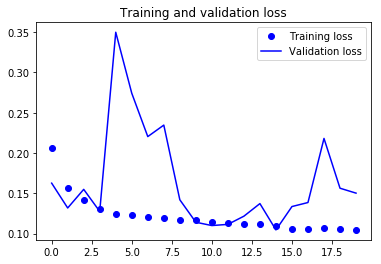

In [35]:
# To visualize single layer GRN model's performance

import matplotlib.pyplot as plt

loss_GRN = history_GRN.history['loss']
val_loss_GRN = history_GRN.history['val_loss']

epochs_GRN = range(len(loss_GRN))

plt.figure()

plt.plot(epochs_GRN, loss_GRN, 'bo', label='Training loss')
plt.plot(epochs_GRN, val_loss_GRN, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


from keras.models import load_model
model_GRN.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_15min.h5')




### Add dropout to fight overfitting

In [36]:


# Using dropout to fight overfitting in GRN single layer model

model_GRN_dropout = Sequential()
model_GRN_dropout.add(layers.GRU(64,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, df_np.shape[-1])))
model_GRN_dropout.add(layers.Dense(1))

model_GRN_dropout.compile(optimizer=RMSprop(), loss='mae')
history_GRN_dropout = model_GRN_dropout.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,   # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)




Epoch 1/40
500/500 [==============================] - 65s - loss: 0.2623 - val_loss: 0.2095
Epoch 2/40
500/500 [==============================] - 65s - loss: 0.2243 - val_loss: 0.2205
Epoch 3/40
500/500 [==============================] - 61s - loss: 0.2130 - val_loss: 0.1674
Epoch 4/40
500/500 [==============================] - 63s - loss: 0.1997 - val_loss: 0.2330
Epoch 5/40
500/500 [==============================] - 62s - loss: 0.1933 - val_loss: 0.1472
Epoch 6/40
500/500 [==============================] - 62s - loss: 0.1887 - val_loss: 0.3982
Epoch 7/40
500/500 [==============================] - 62s - loss: 0.1863 - val_loss: 0.2478
Epoch 8/40
500/500 [==============================] - 63s - loss: 0.1792 - val_loss: 0.1662
Epoch 9/40
500/500 [==============================] - 63s - loss: 0.1741 - val_loss: 0.1600
Epoch 10/40
500/500 [==============================] - 61s - loss: 0.1677 - val_loss: 0.2335
Epoch 11/40
500/500 [==============================] - 62s - loss: 0.1657 - val

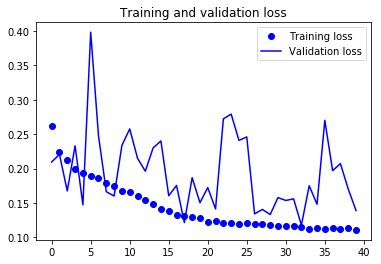

In [37]:
# To visualize the model performance for GRN with dropout
loss_GRN_dropout = history_GRN_dropout.history['loss']
val_loss_GRN_dropout = history_GRN_dropout.history['val_loss']

epochs_GRN_dropout = range(len(loss_GRN_dropout))

plt.figure()

plt.plot(epochs_GRN_dropout, loss_GRN_dropout, 'bo', label='Training loss')
plt.plot(epochs_GRN_dropout, val_loss_GRN_dropout, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_dropout.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_dropout_15min.h5')

### To stack layers on GRN model

In [38]:
# To stack recurrent layers on last model
model_GRN_dropout_stacked = Sequential()
model_GRN_dropout_stacked.add(layers.GRU(64,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     return_sequences=True,
                     input_shape=(None, df_np.shape[-1])))
model_GRN_dropout_stacked.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.1))
model_GRN_dropout_stacked.add(layers.Dense(1))

model_GRN_dropout_stacked.compile(optimizer=RMSprop(), loss='mae')
history_GRN_dropout_stacked = model_GRN_dropout_stacked.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,  # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/40
500/500 [==============================] - 146s - loss: 0.2866 - val_loss: 0.2140
Epoch 2/40
500/500 [==============================] - 146s - loss: 0.2434 - val_loss: 0.2399
Epoch 3/40
500/500 [==============================] - 146s - loss: 0.2207 - val_loss: 0.2328
Epoch 4/40
500/500 [==============================] - 145s - loss: 0.2124 - val_loss: 0.4360
Epoch 5/40
500/500 [==============================] - 146s - loss: 0.2110 - val_loss: 0.2902
Epoch 6/40
500/500 [==============================] - 148s - loss: 0.2074 - val_loss: 0.1898
Epoch 7/40
500/500 [==============================] - 146s - loss: 0.1978 - val_loss: 0.2241
Epoch 8/40
500/500 [==============================] - 146s - loss: 0.1904 - val_loss: 0.1510
Epoch 9/40
500/500 [==============================] - 146s - loss: 0.1842 - val_loss: 0.7208
Epoch 10/40
500/500 [==============================] - 146s - loss: 0.1789 - val_loss: 0.3420
Epoch 11/40
500/500 [==============================] - 145s - loss: 0

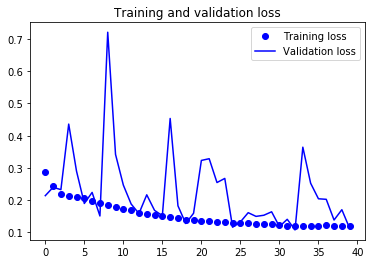

In [39]:
# To visualize the stacked GRN model with dropout

loss_GRN_dropout_stacked = history_GRN_dropout_stacked.history['loss']
val_loss_GRN_dropout_stacked = history_GRN_dropout_stacked.history['val_loss']

epochs_GRN_dropout_stacked = range(len(loss_GRN_dropout_stacked))

plt.figure()

plt.plot(epochs_GRN_dropout_stacked, loss_GRN_dropout_stacked, 'bo', label='Training loss')
plt.plot(epochs_GRN_dropout_stacked, val_loss_GRN_dropout_stacked, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_dropout_stacked.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_dropout_stacked_15min.h5')

### Using bidirectional RNN

To use regular RNNs, each processing input sequence in one direction (chronologically and antichronologically), then merging their representations. By processing a sequence both way, a bidirectional RNN is able to catch patterns that may have been overlooked by a one-direction RNN.

In our case, the model had been processing the earliest datapoint first. Maybe, the more recent datapoints carry more relevant information.

To write a variant of our data generator, where the input sequences get reverted along the time dimension (replace the last line with yield samples[:, ::-1, :], targets). Training the same one-GRU-layer network as we used in the first experiment in this section

In [40]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=4):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    df_np,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=70080,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    df_np,
    lookback=lookback,
    delay=delay,
    min_index=70081,
    max_index=72960,
    step=step,
    batch_size=batch_size)


In [41]:
# To define and fit a bidirectional GRN
model_GRN_bidirection = Sequential()
model_GRN_bidirection.add(layers.GRU(64, input_shape=(None, df_np.shape[-1])))
model_GRN_bidirection.add(layers.Dense(1))

model_GRN_bidirection.compile(optimizer=RMSprop(), loss='mae')
history_GRN_bidirection = model_GRN_bidirection.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,          # to run 20 epochs when run for real
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)


Epoch 1/20
500/500 [==============================] - 62s - loss: 0.5112 - val_loss: 0.4427
Epoch 2/20
500/500 [==============================] - 61s - loss: 0.3158 - val_loss: 0.4539
Epoch 3/20
500/500 [==============================] - 61s - loss: 0.1775 - val_loss: 0.4248
Epoch 4/20
500/500 [==============================] - 62s - loss: 0.1448 - val_loss: 0.4292
Epoch 5/20
500/500 [==============================] - 63s - loss: 0.1286 - val_loss: 0.4018
Epoch 6/20
500/500 [==============================] - 62s - loss: 0.1181 - val_loss: 0.4160
Epoch 7/20
500/500 [==============================] - 62s - loss: 0.1097 - val_loss: 0.3839
Epoch 8/20
500/500 [==============================] - 61s - loss: 0.1025 - val_loss: 0.4104
Epoch 9/20
500/500 [==============================] - 62s - loss: 0.0984 - val_loss: 0.3999
Epoch 10/20
500/500 [==============================] - 61s - loss: 0.0945 - val_loss: 0.4172
Epoch 11/20
500/500 [==============================] - 61s - loss: 0.0908 - val

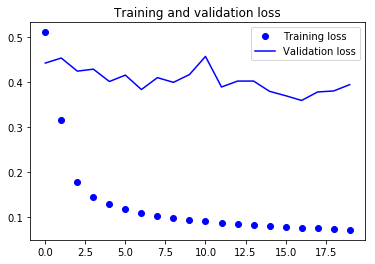

In [42]:
# To visualize the bidirectional GRN model performance
loss_GRN_bidirection = history_GRN_bidirection.history['loss']
val_loss_GRN_bidirection = history_GRN_bidirection.history['val_loss']

epochs_GRN_bidirection = range(len(loss_GRN_bidirection))

plt.figure()

plt.plot(epochs_GRN_bidirection, loss_GRN_bidirection, 'bo', label='Training loss')
plt.plot(epochs_GRN_bidirection, val_loss_GRN_bidirection, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_bidirection.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_bidirectional_15min.h5')


### To fit LSTM model, so as to compare performance and resource needs against GRN

In [43]:
# To model and fit a single layer LSTM

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model_LSTM = Sequential()
model_LSTM.add(layers.LSTM(64, input_shape=(None, df_np.shape[-1])))
model_LSTM.add(layers.Dense(1))

model_LSTM.compile(optimizer=RMSprop(), loss='mae')
history_LSTM = model_LSTM.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,  # to use 20 epoch when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/20
500/500 [==============================] - 72s - loss: 0.2219 - val_loss: 0.1725
Epoch 2/20
500/500 [==============================] - 71s - loss: 0.1519 - val_loss: 0.1301
Epoch 3/20
500/500 [==============================] - 71s - loss: 0.1399 - val_loss: 0.1346
Epoch 4/20
500/500 [==============================] - 70s - loss: 0.1316 - val_loss: 0.1461
Epoch 5/20
500/500 [==============================] - 70s - loss: 0.1239 - val_loss: 0.1743
Epoch 6/20
500/500 [==============================] - 71s - loss: 0.1230 - val_loss: 0.2420
Epoch 7/20
500/500 [==============================] - 71s - loss: 0.1200 - val_loss: 0.2726
Epoch 8/20
500/500 [==============================] - 71s - loss: 0.1190 - val_loss: 0.2002
Epoch 9/20
500/500 [==============================] - 71s - loss: 0.1167 - val_loss: 0.2069
Epoch 10/20
500/500 [==============================] - 70s - loss: 0.1164 - val_loss: 0.1787
Epoch 11/20
500/500 [==============================] - 70s - loss: 0.1137 - val

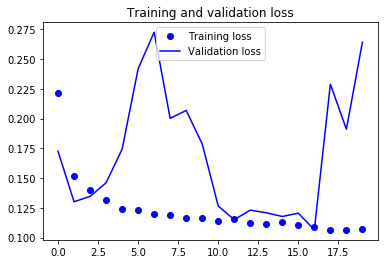

In [44]:
# To visualize the single layer LSTM model performance
import matplotlib.pyplot as plt

loss_LSTM = history_LSTM.history['loss']
val_loss_LSTM = history_LSTM.history['val_loss']

epochs_LSTM = range(len(loss_LSTM))

plt.figure()

plt.plot(epochs_LSTM, loss_LSTM, 'bo', label='Training loss')
plt.plot(epochs_LSTM, val_loss_LSTM, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


from keras.models import load_model
model_LSTM.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_15min.h5')


In [45]:
# Using dropout to fight overfitting in LSTM single layer model

model_LSTM_dropout = Sequential()
model_LSTM_dropout.add(layers.LSTM(64,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, df_np.shape[-1])))
model_LSTM_dropout.add(layers.Dense(1))

model_LSTM_dropout.compile(optimizer=RMSprop(), loss='mae')
history_LSTM_dropout = model_LSTM_dropout.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,   # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/40
500/500 [==============================] - 79s - loss: 0.2668 - val_loss: 0.3273
Epoch 2/40
500/500 [==============================] - 77s - loss: 0.2105 - val_loss: 0.3516
Epoch 3/40
500/500 [==============================] - 77s - loss: 0.2018 - val_loss: 0.2155
Epoch 4/40
500/500 [==============================] - 77s - loss: 0.1897 - val_loss: 0.2695
Epoch 5/40
500/500 [==============================] - 77s - loss: 0.1811 - val_loss: 0.2129
Epoch 6/40
500/500 [==============================] - 77s - loss: 0.1660 - val_loss: 0.1577
Epoch 7/40
500/500 [==============================] - 77s - loss: 0.1564 - val_loss: 0.1311
Epoch 8/40
500/500 [==============================] - 77s - loss: 0.1484 - val_loss: 0.3667
Epoch 9/40
500/500 [==============================] - 77s - loss: 0.1431 - val_loss: 0.1775
Epoch 10/40
500/500 [==============================] - 77s - loss: 0.1363 - val_loss: 0.1698
Epoch 11/40
500/500 [==============================] - 77s - loss: 0.1352 - val

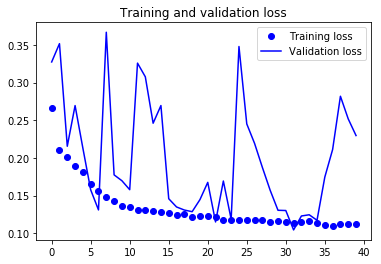

In [46]:
# To visualize the model performance for LSTM with dropout
loss_LSTM_dropout = history_LSTM_dropout.history['loss']
val_loss_LSTM_dropout = history_LSTM_dropout.history['val_loss']

epochs_LSTM_dropout = range(len(loss_LSTM_dropout))

plt.figure()

plt.plot(epochs_LSTM_dropout, loss_LSTM_dropout, 'bo', label='Training loss')
plt.plot(epochs_LSTM_dropout, val_loss_LSTM_dropout, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_LSTM_dropout.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_dropout_15min.h5')


In [47]:
# To stack recurrent layers on last LSTM model
model_LSTM_dropout_stacked = Sequential()
model_LSTM_dropout_stacked.add(layers.LSTM(64,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     return_sequences=True,
                     input_shape=(None, df_np.shape[-1])))
model_LSTM_dropout_stacked.add(layers.LSTM(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.1))
model_LSTM_dropout_stacked.add(layers.Dense(1))

model_LSTM_dropout_stacked.compile(optimizer=RMSprop(), loss='mae')
history_LSTM_dropout_stacked = model_LSTM_dropout_stacked.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,  # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/40
500/500 [==============================] - 191s - loss: 53.5844 - val_loss: 0.3300
Epoch 2/40
500/500 [==============================] - 189s - loss: 154.4030 - val_loss: 0.3565
Epoch 3/40
500/500 [==============================] - 188s - loss: 0.4670 - val_loss: 0.3101
Epoch 4/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 5/40
500/500 [==============================] - 188s - loss: nan - val_loss: nan
Epoch 6/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 7/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 8/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 9/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 10/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 11/40
500/500 [==============================] - 187s - loss: nan - val_loss: nan
Epoch 12/40
500/500 

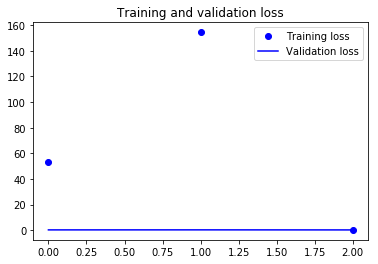

In [48]:
# To visualize the stacked LSTM model with dropout

loss_LSTM_dropout_stacked = history_LSTM_dropout_stacked.history['loss']
val_loss_LSTM_dropout_stacked = history_LSTM_dropout_stacked.history['val_loss']

epochs_LSTM_dropout_stacked = range(len(loss_LSTM_dropout_stacked))

plt.figure()

plt.plot(epochs_LSTM_dropout_stacked, loss_LSTM_dropout_stacked, 'bo', label='Training loss')
plt.plot(epochs_LSTM_dropout_stacked, val_loss_LSTM_dropout_stacked, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_LSTM_dropout_stacked.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_dropout_stacked_15min.h5')


In [49]:
# To define and fit a bidirectional LSTM
model_LSTM_bidirection = Sequential()
model_LSTM_bidirection.add(layers.LSTM(64, input_shape=(None, df_np.shape[-1])))
model_LSTM_bidirection.add(layers.Dense(1))

model_LSTM_bidirection.compile(optimizer=RMSprop(), loss='mae')
history_LSTM_bidirection = model_LSTM_bidirection.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,          # to run 20 epochs when run for real
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)


Epoch 1/20
500/500 [==============================] - 83s - loss: 0.3872 - val_loss: 0.4925
Epoch 2/20
500/500 [==============================] - 82s - loss: 0.2132 - val_loss: 0.5285
Epoch 3/20
500/500 [==============================] - 81s - loss: 0.1623 - val_loss: 0.5134
Epoch 4/20
500/500 [==============================] - 81s - loss: 0.1349 - val_loss: 0.5214
Epoch 5/20
500/500 [==============================] - 81s - loss: 0.1186 - val_loss: 0.5337
Epoch 6/20
500/500 [==============================] - 81s - loss: 0.1072 - val_loss: 0.5558
Epoch 7/20
500/500 [==============================] - 81s - loss: 0.0984 - val_loss: 0.5817
Epoch 8/20
500/500 [==============================] - 82s - loss: 0.0898 - val_loss: 0.4872
Epoch 9/20
500/500 [==============================] - 81s - loss: 0.0842 - val_loss: 0.5113
Epoch 10/20
500/500 [==============================] - 81s - loss: 0.0797 - val_loss: 0.4806
Epoch 11/20
500/500 [==============================] - 81s - loss: 0.0753 - val

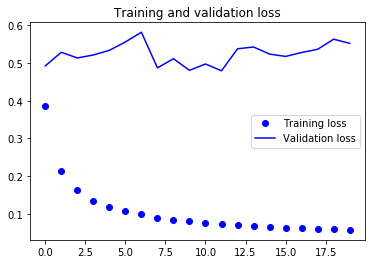

In [50]:


# To visualize the bidirectional LSTM model performance
loss_LSTM_bidirection = history_LSTM_bidirection.history['loss']
val_loss_LSTM_bidirection = history_LSTM_bidirection.history['val_loss']

epochs_LSTM_bidirection = range(len(loss_LSTM_bidirection))

plt.figure()

plt.plot(epochs_LSTM_bidirection, loss_LSTM_bidirection, 'bo', label='Training loss')
plt.plot(epochs_LSTM_bidirection, val_loss_LSTM_bidirection, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_LSTM_bidirection.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_LSTM_bidirectional_15min.h5')



### Final choice of model  

It seems that stacked GRN with dropout performed better amongst the different architectures trialled above.  To add one more layer in attempt to improve performance.



In [55]:
# To stack 1 > layers on the GRN with dropout model experimented with above
model_GRN_dropout_3layers = Sequential()
model_GRN_dropout_3layers.add(layers.GRU(64,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     return_sequences=True,
                     input_shape=(None, df_np.shape[-1])))
model_GRN_dropout_3layers.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.1,
                     return_sequences=True,))
model_GRN_dropout_3layers.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.1))
model_GRN_dropout_3layers.add(layers.Dense(1))

model_GRN_dropout_3layers.compile(optimizer=RMSprop(), loss='mae')
history_GRN_dropout_3layers = model_GRN_dropout_3layers.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,  # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 306s - loss: 0.3209 - val_loss: 0.3357
Epoch 2/40
500/500 [==============================] - 308s - loss: 0.2556 - val_loss: 0.4478
Epoch 3/40
500/500 [==============================] - 310s - loss: 0.2382 - val_loss: 0.2461
Epoch 4/40
500/500 [==============================] - 311s - loss: 0.2235 - val_loss: 0.1835
Epoch 5/40
500/500 [==============================] - 311s - loss: 0.2109 - val_loss: 0.4717
Epoch 6/40
500/500 [==============================] - 310s - loss: 0.2000 - val_loss: 0.2814
Epoch 7/40
500/500 [==============================] - 310s - loss: 0.1918 - val_loss: 0.3073
Epoch 8/40
500/500 [==============================] - 310s - loss: 0.1861 - val_loss: 0.2546
Epoch 9/40
500/500 [==============================] - 309s - loss: 0.1757 - val_loss: 0.2532
Epoch 10/40
500/500 [==============================] - 310s - loss: 0.1737 - val_loss: 0.2863
Epoch 11/40
500/500 [==============================] - 309s - loss: 0

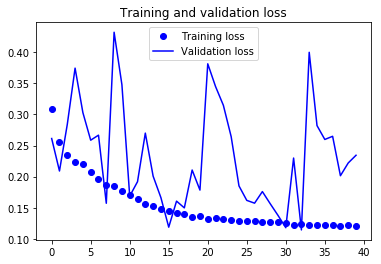

In [52]:
# To visualize the 3 layers stacked GRN model with dropout

loss_GRN_dropout_3layers = history_GRN_dropout_3layers.history['loss']
val_loss_GRN_dropout_3layers = history_GRN_dropout_3layers.history['val_loss']

epochs_GRN_dropout_3layers = range(len(loss_GRN_dropout_3layers))

plt.figure()

plt.plot(epochs_GRN_dropout_3layers, loss_GRN_dropout_3layers, 'bo', label='Training loss')
plt.plot(epochs_GRN_dropout_3layers, val_loss_GRN_dropout_3layers, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_dropout_3layers.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_dropout_3layers_15min.h5')

In [59]:
# To remove recurrent dropout from the model above, and saved model with different name
# To stack 1 > layers on the GRN with dropout model experimented with above
model_GRN_dropout_3layers_woRecdropout = Sequential()
model_GRN_dropout_3layers_woRecdropout.add(layers.GRU(64,
                     dropout=0.1,
                     return_sequences=True,
                     input_shape=(None, df_np.shape[-1])))
model_GRN_dropout_3layers_woRecdropout.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     return_sequences=True,))
model_GRN_dropout_3layers_woRecdropout.add(layers.GRU(64, activation='relu',
                     dropout=0.1))
model_GRN_dropout_3layers_woRecdropout.add(layers.Dense(1))

model_GRN_dropout_3layers_woRecdropout.compile(optimizer=RMSprop(), loss='mae')
history_GRN_dropout_3layers_woRecdropout = model_GRN_dropout_3layers_woRecdropout.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,  # to use 40 epochs when fitting for real
                              validation_data=val_gen,
                              validation_steps=val_steps)



Epoch 1/40
500/500 [==============================] - 311s - loss: 0.3119 - val_loss: 0.2443
Epoch 2/40
500/500 [==============================] - 312s - loss: 0.2540 - val_loss: 0.2530
Epoch 3/40
500/500 [==============================] - 315s - loss: 0.2333 - val_loss: 0.6670
Epoch 4/40
500/500 [==============================] - 314s - loss: 0.2138 - val_loss: 0.3585
Epoch 5/40
500/500 [==============================] - 313s - loss: 0.1976 - val_loss: 0.3444
Epoch 6/40
500/500 [==============================] - 315s - loss: 0.1888 - val_loss: 0.2715
Epoch 7/40
500/500 [==============================] - 314s - loss: 0.1799 - val_loss: 0.2321
Epoch 8/40
500/500 [==============================] - 314s - loss: 0.1759 - val_loss: 0.2440
Epoch 9/40
500/500 [==============================] - 313s - loss: 0.1654 - val_loss: 0.1056
Epoch 10/40
500/500 [==============================] - 314s - loss: 0.1588 - val_loss: 0.1980
Epoch 11/40
500/500 [==============================] - 315s - loss: 0

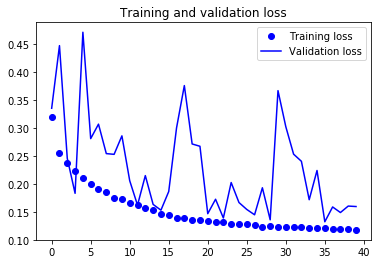

In [60]:
# To visualize the 3 layers stacked GRN model with without recurrent dropout

loss_GRN_dropout_3layers_woRecdropout = history_GRN_dropout_3layers.history['loss']
val_loss_GRN_dropout_3layers_woRecdropout = history_GRN_dropout_3layers.history['val_loss']

epochs_GRN_dropout_3layers_woRecdropout = range(len(loss_GRN_dropout_3layers_woRecdropout))

plt.figure()

plt.plot(epochs_GRN_dropout_3layers_woRecdropout, loss_GRN_dropout_3layers_woRecdropout, 'bo', label='Training loss')
plt.plot(epochs_GRN_dropout_3layers_woRecdropout, val_loss_GRN_dropout_3layers_woRecdropout, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

from keras.models import load_model
model_GRN_dropout_3layers_woRecdropout.save('C:\\Users\\bst\Documents\Big Project - time series forecasts with LSTM\Personal Proj 1 - SolarIrradianceFcst_GRN_dropout_3layers_15min_woRecdropout.h5')

Final model choice is "model_GRN_dropout_3layers_woRecdropout"

In [209]:
# To evaluate the chosen model with test sets
test_loss = model_GRN_dropout_3layers_woRecdropout.evaluate_generator(test_gen, steps=4)
print('test loss: ', test_loss)

test loss:  0.210835371166
